In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Prajna/Desktop/Next_Tech/chrome_reviews.csv')

In [3]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [4]:
df.drop(['ID'],axis=1,inplace= True)
df.drop(['Review URL'],axis=1,inplace= True)
df.drop(['Thumbs Up'],axis=1,inplace= True)
df.drop(['User Name'],axis=1,inplace= True)
df.drop(['Developer Reply'],axis=1,inplace= True)
df.drop(['Version'],axis=1,inplace= True)
df.drop(['Review Date'],axis=1,inplace= True)
df.drop(['App ID'],axis=1,inplace= True)

In [5]:
df.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [6]:
df.shape

(7204, 2)

In [7]:
df.isnull().sum()

Text    1
Star    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Text    0
Star    0
dtype: int64

In [10]:
df.shape

(7203, 2)

In [11]:
df_text = df.iloc[:,0:1]
df_text.head()

,Text
0,This is very helpfull aap.
1,Good
2,Not able to update. Neither able to uninstall.
3,Nice app
4,Many unwanted ads


In [12]:
msg = df.copy()
msg.reset_index(inplace=True)
msg.head()

,index,Text,Star
0,0,This is very helpfull aap.,5
1,1,Good,3
2,2,Not able to update. Neither able to uninstall.,1
3,3,Nice app,4
4,4,Many unwanted ads,1


In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,len(msg)):
  review = re.sub('[^a-zA-Z]', ' ', msg['Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()  
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prajna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
corpus[1]

'good'

In [15]:
# Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
df_text_new = cv.fit_transform(corpus).toarray()

In [16]:
df_text_new.shape

(7203, 1500)

In [17]:
# Creating a new DF that contains the vectorized words
df_txt_pd = pd.DataFrame(df_text_new, columns=cv.get_feature_names())
df_txt_pd

,aa,aap,abba,abil,abl,absolut,accept,access,accident,accord,...,youtub,ys,yt,yup,yuuup,yyy,zdx,zero,zz,zzz
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


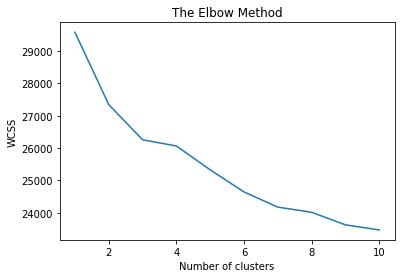

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_txt_pd)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(df_txt_pd)
pred = kmeans.predict(df_txt_pd)

#y_kmeans = kmeans.fit_predict(X)

In [20]:
frame = pd.DataFrame(df_txt_pd)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    4372
2    1474
1    1357
Name: cluster, dtype: int64

In [21]:
pred

array([0, 1, 2, ..., 1, 0, 2], dtype=int32)

In [22]:
df['NEW_COLUMN'] = pd.Series(pred, index=df.index)

In [23]:
df.head()

,Text,Star,NEW_COLUMN
0,This is very helpfull aap.,5,0
1,Good,3,1
2,Not able to update. Neither able to uninstall.,1,2
3,Nice app,4,0
4,Many unwanted ads,1,0


In [24]:
df.to_csv(r'C:\Users\Prajna\Desktop\Next_Tech\dataset.csv', index=False) 

In [25]:
df1 = df.loc[np.logical_and(df.Star == 1, df.NEW_COLUMN == 1)]
df1.head()

,Text,Star,NEW_COLUMN
101,Good,1,1
158,Good,1,1
312,Good,1,1
371,Good😊,1,1
389,Good,1,1


In [26]:
df2 = df.loc[np.logical_and(df.Star == 1, df.NEW_COLUMN == 0)]
df2.head()

,Text,Star,NEW_COLUMN
4,Many unwanted ads,1,0
8,Very bad app 😞,1,0
15,Very coming in real status. Thank you,1,0
19,I want to download greana free fire but that n...,1,0
30,Data consuming,1,0


In [27]:
df1.to_csv(r'C:\Users\Prajna\Desktop\Next_Tech\dataset1.csv', index=False) 

In [28]:
df2.to_csv(r'C:\Users\Prajna\Desktop\Next_Tech\dataset2.csv', index=False) 

In [30]:
new_dataset = pd.concat([df1, df2], axis=0)
new_dataset.head()

,Text,Star,NEW_COLUMN
101,Good,1,1
158,Good,1,1
312,Good,1,1
371,Good😊,1,1
389,Good,1,1


In [31]:
new_dataset.to_csv(r'C:\Users\Prajna\Desktop\Next_Tech\dataset_final.csv', index=False) 